<h1 style="text-align:center;">Principal Component Analysis (PCA)</h1>


<u>**Author</u> :** [Younes Dahami](https://www.linkedin.com/in/dahami/)

# Introduction

**Principal Component Analysis (PCA)** is a dimensionality reduction technique used to identify patterns and reduce the number of features in a dataset while retaining the most important information. It achieves this by <span style="color:blue">transforming the original variables into a new set of orthogonal variables</span>
 called **principal components.**
 
 <img src="PCA.png" alt="PCA" style="width:500px;height:400px;">
 <figcaption><center><strong>Figure 1 : PCA of a multivariate Gaussian distribution centered at (1,3) with a standard deviation of 3 in roughly the (0.866, 0.5) direction and of 1 in the orthogonal direction. The vectors shown are the eigenvectors of the covariance matrix scaled by the square root of the corresponding eigenvalue, and shifted so their tails are at the mean.</center></figcaption>

Image courtesy of [Wikipedia](https://en.wikipedia.org/wiki/Principal_component_analysis).
    
Here's a detailed definition of PCA :

* <u>**Objective**</u> **:** The primary goal of PCA is to transform a dataset with a potentially large number of <span style="color:blue">correlated variables</span> into a dataset with a smaller number of <span style="color:blue">uncorrelated variables (principal components)</span>, thereby reducing the dimensionality of the data while retaining most of the variance.

* <u>**Orthogonal Transformation**</u> **:** PCA performs an orthogonal linear transformation of the data to create new uncorrelated variables called principal components. Each principal component is a linear combination of the original variables.

* <u>**Variance Maximization**</u> **:** PCA aims to maximize the variance of the data along the principal components. The first principal component captures the maximum variance in the data, followed by subsequent components capturing decreasing amounts of variance.

* <u>**Eigenvalues**</u> and * <u>**Eigenvectors**</u> **:** PCA identifies the principal components by computing the eigenvectors (directions) and eigenvalues (magnitude) of the covariance matrix of the original data :
    * The eigenvectors represent the directions of maximum variance,
    * The eigenvalues indicate the amount of variance explained by each principal component.
    
* <u>**Dimensionality Reduction**</u> **:** After computing the principal components, PCA allows for the selection of a subset of these components that capture most of the variance in the data. By retaining only the top-ranked principal components, PCA achieves dimensionality reduction while preserving as much information as possible.

* <u>**Applications**</u> **:** PCA is widely used in various fields, including machine learning, image processing, genetics, finance, and social sciences. It can help visualize high-dimensional data, remove noise, identify patterns, and improve the performance of machine learning algorithms by reducing overfitting and computational complexity.

* <u>**Assumptions**</u> **:** PCA assumes linearity, orthogonality, and homoscedasticity (constant variance) in the data. It is sensitive to scale, so <span style="color:blue">it's essential to standardize or normalize the variables before applying PCA</span> to ensure that variables with larger scales do not dominate the analysis.
    
<img src="PCA1.png" alt="PCA1" style="width:500px;height:400px;">
 <figcaption><center><strong>Figure 2 : The original 3-dimensional dataset is represented here. The red, blue, and green arrows indicate the direction of the first, second, and third principal components, respectively.</center></figcaption>
     
Image courtesy of the author of [Principal Component Analysis (PCA) Explained Visually with Zero Math](https://towardsdatascience.com/principal-component-analysis-pca-explained-visually-with-zero-math-1cbf392b9e7d).

     
<img src="PCA2.png" alt="PCA1" style="width:500px;height:400px;">
 <figcaption><center><strong>Figure 3 : PCA</center></figcaption>

Sketch courtesy of the author of [PCA clearly explained ](https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e).

So, PCA is a powerful statistical technique for dimensionality reduction, visualization, and pattern identification in high-dimensional datasets. It provides a systematic way to extract the most critical information from complex data while reducing redundancy and computational complexity.

# 1) Loading the dataset

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_digits

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 'dataset' is a dictionary
dataset = load_digits()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

* `data` :  represents the features
* `feature_names` : represents thee features names
* `target` : target variable
* `target_names` : the target classes

# 2) EDA

In [3]:
type(dataset.data)

numpy.ndarray

In [4]:
dataset.data.shape

(1797, 64)

The dataset contains $1797$ images, each image represents a digit in $64$ pixels ($8$ by $8$)

In [5]:
# first row :
print(dataset.data[0])
print((len(dataset.data[0])))

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
64


In [6]:
dataset.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 640x480 with 0 Axes>

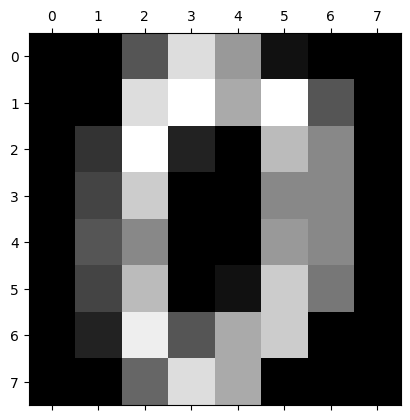

In [7]:
# Plotting the black & white image 8px x8px
plt.gray()
plt.matshow(dataset.data[0].reshape(8,8))

The first image represents $0$

In [8]:
(dataset.images[0] == dataset.data[0].reshape(8,8)).all()

True

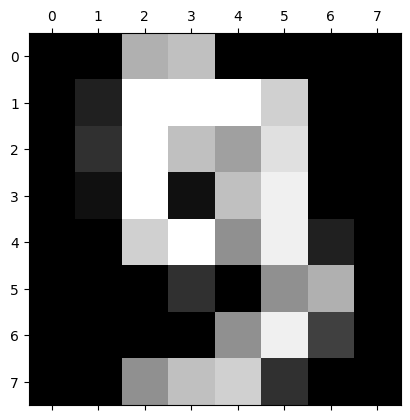

In [9]:
plt.matshow(dataset.data[9].reshape(8,8))

`dataset.data[9]` represents $9$

In [10]:
dataset.target

array([0, 1, 2, ..., 8, 9, 8])

In [11]:
print(f"We have {dataset.data.shape[0]} examples, and {len(dataset.target)} targets, each example is tied to a target")

We have 1797 examples, and 1797 targets, each example is tied to a target


Let's convert the `data` (which represents the features) in `dataset` into a dataframe :

In [12]:
df = pd.DataFrame(data = dataset.data,
                 columns = dataset.feature_names)

df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

In [14]:
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


The first thing we can say is that the variables are not standardized nor normalized, so we need to do that later on.

# 3) Preprocessing the data

In [15]:
# Features & target
X = df
y = dataset.target

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Normalizing the features :
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [17]:
# 'X_scaled' is a numpy array
type(X_scaled)

numpy.ndarray

In [18]:
# The mean and standard deviation across each feature
print(X_scaled.mean(0))
print(X_scaled.std(0))

[ 0.00000000e+00 -2.56086502e-16 -2.34771702e-16 -3.05326777e-16
  1.39689163e-16 -3.16941798e-16 -9.59598443e-16  6.06946633e-16
 -4.62368967e-16  7.55084971e-17 -5.33796713e-17  5.71483749e-17
  4.52862258e-17 -1.49512505e-17  8.96580775e-16 -2.17719863e-16
 -6.87973761e-16 -7.70421876e-17  2.59978769e-16  2.32547550e-16
  1.05878949e-16 -1.40863021e-16 -1.15408826e-16 -2.26477465e-16
  4.51109193e-16  3.79341646e-17 -7.71657517e-17 -9.60092699e-17
 -8.72980041e-17 -1.50624582e-16 -1.05597840e-15 -2.52140175e-16
  0.00000000e+00  3.42148865e-16  1.21710593e-16 -1.07871419e-16
 -2.00606242e-16 -1.09354188e-17 -7.12964591e-17  0.00000000e+00
  3.00716294e-16 -1.74657790e-16  4.03436636e-16  1.92111213e-16
  2.61337974e-17  5.38739275e-17  4.71396866e-17  8.63759074e-16
  2.62048467e-16  3.33128689e-16  8.36528645e-17  1.98775949e-16
  4.61017485e-16  5.01670059e-17  4.71582212e-16 -4.92032063e-16
  2.25353805e-16  3.44125890e-16  5.95269830e-17 -6.11460582e-16
 -5.19092591e-16  1.69529

In [19]:
print(X_scaled.shape)
print(X_scaled.mean(0).shape)

(1797, 64)
(64,)


In [20]:
(pd.DataFrame(X_scaled, columns = df.columns)).describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1797.000000,1.797000e+03,1.797000e+03,1.797000e+03,...,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03
mean,0.0,-6.326480e-17,7.908099e-17,3.163240e-17,-5.535670e-17,-5.535670e-17,0.000000,1.581620e-17,-2.767835e-17,2.372430e-17,...,-7.908099e-18,2.372430e-17,-1.186215e-17,-3.954050e-17,-6.326480e-17,-1.818863e-16,4.349455e-17,4.942562e-17,9.885124e-17,1.581620e-17
std,0.0,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278,1.000278e+00,1.000278e+00,1.000278e+00,...,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00
min,0.0,-3.350165e-01,-1.094937e+00,-2.786437e+00,-2.764242e+00,-1.020657e+00,-0.409724,-1.250229e-01,-5.907756e-02,-6.240093e-01,...,-7.574358e-01,-2.097851e-01,-2.359646e-02,-2.990813e-01,-1.089383e+00,-2.764171e+00,-2.394110e+00,-1.146647e+00,-5.056698e-01,-1.960075e-01
25%,0.0,-3.350165e-01,-8.845657e-01,-4.321998e-01,-4.311703e-01,-1.020657e+00,-0.409724,-1.250229e-01,-5.907756e-02,-6.240093e-01,...,-7.574358e-01,-2.097851e-01,-2.359646e-02,-2.990813e-01,-8.933661e-01,-2.490095e-01,-3.667712e-01,-1.146647e+00,-5.056698e-01,-1.960075e-01
50%,0.0,-3.350165e-01,-2.534522e-01,2.740715e-01,2.687512e-01,-3.145470e-01,-0.409724,-1.250229e-01,-5.907756e-02,-6.240093e-01,...,-5.541027e-01,-2.097851e-01,-2.359646e-02,-2.990813e-01,-3.053152e-01,2.082926e-01,4.441644e-01,-1.295226e-01,-5.056698e-01,-1.960075e-01
75%,0.0,-3.350165e-01,7.984036e-01,7.449191e-01,7.353655e-01,9.211453e-01,-0.409724,-1.250229e-01,-5.907756e-02,3.148782e-01,...,6.658963e-01,-2.097851e-01,-2.359646e-02,-2.990813e-01,8.707865e-01,8.942457e-01,8.496321e-01,8.876023e-01,-1.660165e-02,-1.960075e-01
max,0.0,8.485857e+00,2.271002e+00,9.803428e-01,9.686727e-01,1.803783e+00,4.402524,1.433847e+01,2.117340e+01,4.383391e+00,...,2.495895e+00,1.299989e+01,4.237924e+01,9.336462e+00,2.046888e+00,8.942457e-01,8.496321e-01,1.565686e+00,3.406875e+00,8.407974e+00


# 4) Splitting the data & building the model 


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                   y, 
                                                   stratify = y, 
                                                   test_size = .2,
                                                   random_state = 25)

In [22]:
print(f"The training dataset's features of shape : {X_train.shape} is tied to the training data's target of shape : {y_train.shape}")
print(f"\nThe test dataset's features of shape : {X_test.shape} is tied to the test data's target of shape : {y_test.shape}")

The training dataset's features of shape : (1437, 64) is tied to the training data's target of shape : (1437,)

The test dataset's features of shape : (360, 64) is tied to the test data's target of shape : (360,)


This is a classification problem, where we try to classify each row from the dataset of features of shape (,64) to a certain class (digit), let's perform a logistic regression :

In [23]:
from sklearn.linear_model import LogisticRegression

# Initiate the model
lor = LogisticRegression()
# Fitting the model to the data
lor.fit(X_train, y_train)
# checking the model's accuracy score
lor.score(X_test, y_test)  

0.9666666666666667

In [24]:
# model classes
lor.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# 5) Performing PCA to reduce dimensions

In [25]:
from sklearn.decomposition import PCA

# using components such that 95% of total variance is retained
pca = PCA(.95)

# fitting the pca to the data and transform it
X_pca = pca.fit_transform(X_scaled)

X_pca.shape


(1797, 40)

In [26]:
# Explained variance ratios 
pca.explained_variance_ratio_

array([0.12033916, 0.09561054, 0.08444415, 0.06498408, 0.04860155,
       0.0421412 , 0.03942083, 0.03389381, 0.02998221, 0.02932003,
       0.02781805, 0.02577055, 0.02275303, 0.0222718 , 0.02165229,
       0.01914167, 0.01775547, 0.01638069, 0.0159646 , 0.01489191,
       0.0134797 , 0.01271931, 0.01165837, 0.01057647, 0.00975316,
       0.00944559, 0.00863014, 0.00836643, 0.00797693, 0.00746471,
       0.00725582, 0.00691911, 0.00653909, 0.00640793, 0.00591384,
       0.00571162, 0.00523637, 0.00481808, 0.00453719, 0.00423163])

In [27]:
pca.explained_variance_ratio_.sum()

0.9507791125066462

In [28]:
# number of principale components selected 
pca.n_components_

40

So we created $40$ principale components out of $64$ original features (columns), so that we can retain $95\%$ of the total variance :

In [29]:
X_pca

array([[ 1.91421366, -0.95450157, -3.94603482, ...,  0.81405925,
         0.0249306 ,  0.32193146],
       [ 0.58898033,  0.9246358 ,  3.92475494, ...,  0.20026094,
         0.08710843, -0.48914299],
       [ 1.30203906, -0.31718883,  3.02333293, ..., -0.214596  ,
        -1.2788745 ,  0.54583387],
       ...,
       [ 1.02259599, -0.14791087,  2.46997365, ...,  0.60136463,
         0.41238798,  1.20886377],
       [ 1.07605522, -0.38090625, -2.45548693, ...,  0.43756556,
        -0.69863483, -0.44339963],
       [-1.25770233, -2.22759088,  0.28362789, ..., -0.38108638,
         0.12855104,  1.32137195]])

Let's now perform a a logistic regression, after we reduced the number of features :

In [30]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca,
                                                            y,
                                                            stratify = y,
                                                            test_size = .2,
                                                            random_state = 25)


In [31]:
lor = LogisticRegression(max_iter = 1500)
lor.fit(X_train_pca, y_train)
lor.score(X_test_pca, y_test)

0.9611111111111111

Let's see the scree plot :

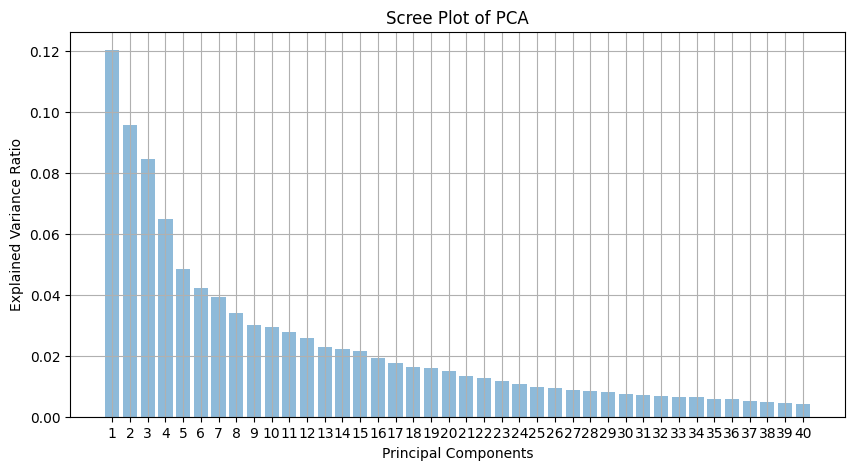

In [32]:
# Get explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot scree plot
plt.figure(figsize=(10, 5))
plt.bar(x = range(1, len(explained_variance_ratio) + 1),
        height = explained_variance_ratio,
        alpha = 0.5)

plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot of PCA')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True)

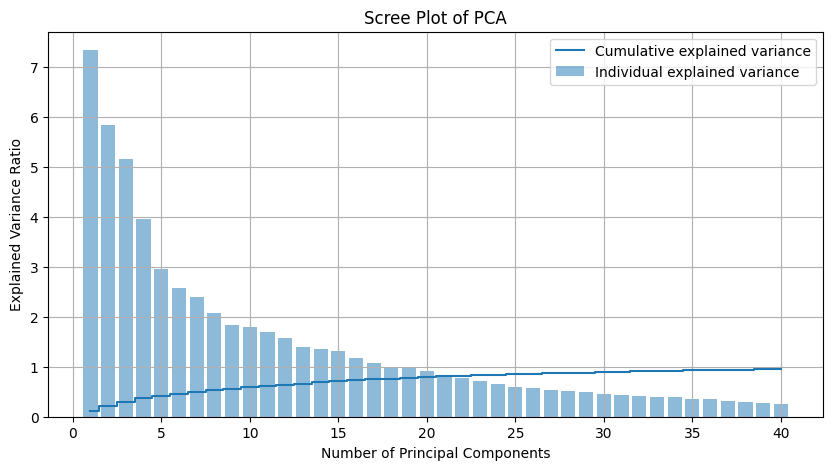

In [33]:
# Plot scree plot
plt.figure(figsize=(10, 5))
explained_variance = pca.explained_variance_
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)


plt.bar(x = range(1, len(explained_variance) + 1),
        height = explained_variance,
        alpha = 0.5,
        align = 'center',
        label = 'Individual explained variance')


plt.step(x = range(1, len(explained_variance) + 1),
         y = cumulative_explained_variance,
         where = 'mid',
         label = 'Cumulative explained variance')



plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot of PCA')
plt.legend()
plt.grid(True)

As we can see, as we include more and more PCs, the **cumulative explained variance** increase to reach **0.95** if we include all the PCs.

Let's now try to select 2 principale components $PC1$ and $PC2$ :

In [34]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(1797, 2)

In [35]:
X_pca

array([[ 1.91421343, -0.95450403],
       [ 0.58897672,  0.92462804],
       [ 1.30204077, -0.31720005],
       ...,
       [ 1.02259323, -0.14788588],
       [ 1.07604979, -0.38090085],
       [-1.25770208, -2.22755814]])

In [36]:
# The explained variances by 'PC1' and 'PC2'
pca.explained_variance_ratio_

array([0.12033916, 0.09561054])

We can see that both variances combined retains `0.12+0.09 = 0.21` which represents $21\%$ of the important feature information.

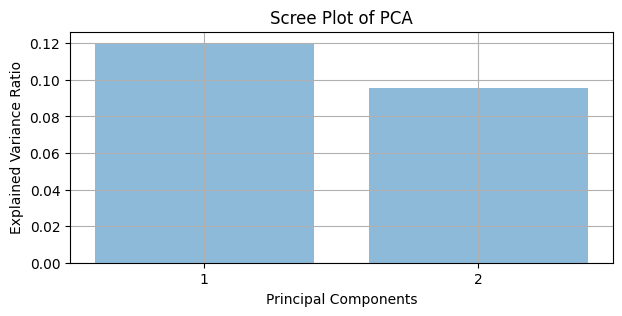

In [37]:
# Get explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot scree plot
plt.figure(figsize=(7, 3))
plt.bar(x = range(1, len(explained_variance_ratio) + 1),
        height = explained_variance_ratio,
        alpha = 0.5)

plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot of PCA')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True)

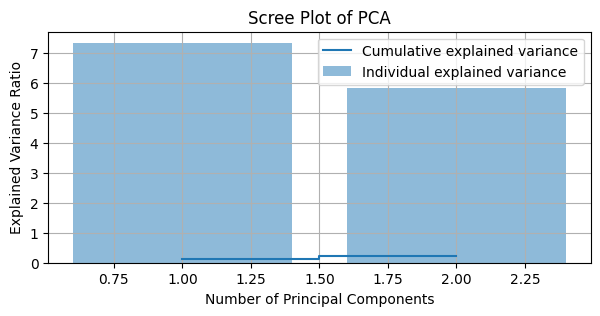

In [38]:
# Plot scree plot
plt.figure(figsize=(7, 3))
explained_variance = pca.explained_variance_
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)


plt.bar(x = range(1, len(explained_variance) + 1),
        height = explained_variance,
        alpha = 0.5,
        align = 'center',
        label = 'Individual explained variance')


plt.step(x = range(1, len(explained_variance) + 1),
         y = cumulative_explained_variance,
         where = 'mid',
         label = 'Cumulative explained variance')



plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot of PCA')
plt.legend()
plt.grid(True)

As we can see, as we include both PCs, the **cumulative explained variance** increase from **0.12 (12\%)** to reach **0.21 (21\%)**.

In [39]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca,
                                                            y,
                                                            stratify = y,
                                                            test_size = .2,
                                                            random_state = 25)

lor = LogisticRegression(max_iter = 1500)
lor.fit(X_train_pca, y_train)
lor.score(X_test_pca, y_test)

0.5472222222222223

# Conclusion

We observe a decrease in accuracy, approximately to $55\%$ (from the orginal $96.67\%$), when using only $2$ components. This reduction in accuracy suggests that the two components do not retain sufficient feature information. Nevertheless, in practical scenarios, we may encounter situations where employing just $2$ or a few PCA components still yields satisfactory accuracy.

# Change Log

| Date (DD-MM-YYYY) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 15-01-2024       | 1.0     | Younes Dahami   |  initial version |
| 30-04-2024       | 1.1     | Younes Dahami   |  scree plots |
